<a href="https://colab.research.google.com/github/CGS2002/PRECOG-_TASK/blob/main/task_2_Community_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.cluster import KMeans
from networkx.algorithms import community


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
glink='/content/drive/MyDrive/IIIT Graph/' # Change the link to the folder ontaing files

#f'{glink}

In [34]:
dfe=pd.read_csv(f'{glink}Cit-HepPh.txt', sep='\t', header=None, names=['source', 'target'],skiprows=4)
dfn=pd.read_csv(f'{glink}cit-HepPh-dates.txt', sep='\t', header=None, names=['Node', 'Time'],skiprows=1)
dfn['Time']=pd.to_datetime(dfn['Time'])

In [35]:
GT=nx.DiGraph()
GT.add_nodes_from(list(set(dfe[['source', 'target']].values.flatten())))
m=[tuple(x) for x in dfe.to_records(index=False)]
GT.add_edges_from(m)

In [36]:
subset_nodes = list(GT.nodes())[:500]
subgraph = GT.subgraph(subset_nodes)

## implementing using libraries
community =   nx.community.girvan_newman(subgraph)


In [37]:
def Girvan_Newman1(G):
    gc=G.copy()
    while gc.number_of_edges()>0:
      edge_betwenness = nx.edge_betweenness_centrality(gc)
      d=pd.DataFrame(list(edge_betwenness.items())).sort_values(1,ascending=False).iloc[0,0]
      gc.remove_edge(*d)
      if len(list(nx.weakly_connected_components(gc))  ) > 1:
            return nx.weakly_connected_components(gc)

In [7]:
m=Girvan_Newman1(subgraph)

In [8]:

SG=dict()
for i, community in enumerate(m):
    SG[f"Community {i+1}"]=list(community)
    print(f"Community {i+1}: {list(community)}")

Community 1: [9306201]
Community 2: [9306202]
Community 3: [9306203]
Community 4: [9306204]
Community 5: [9306205]
Community 6: [9306206]
Community 7: [9306207]
Community 8: [9306208, 9306295]
Community 9: [9306209]
Community 10: [9306210]
Community 11: [9306211]
Community 12: [9306212]
Community 13: [9306213]
Community 14: [9306214]
Community 15: [9503287, 9306215]
Community 16: [9306216]
Community 17: [9306219]
Community 18: [104249, 9306220, 1189]
Community 19: [9306222]
Community 20: [9306224, 9306249]
Community 21: [9306226]
Community 22: [9306227]
Community 23: [9306228]
Community 24: [9306229]
Community 25: [1268, 9306230]
Community 26: [9306231]
Community 27: [9306232]
Community 28: [9306235]
Community 29: [9306236]
Community 30: [9306237]
Community 31: [9306238]
Community 32: [9306240, 1001]
Community 33: [9306241]
Community 34: [9306242]
Community 35: [9306244]
Community 36: [9306245]
Community 37: [9306247]
Community 38: [9306248]
Community 39: [1073, 9306251, 1204]
Communit

Community 18


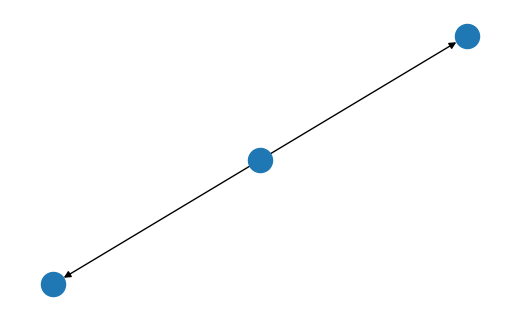

Community 39


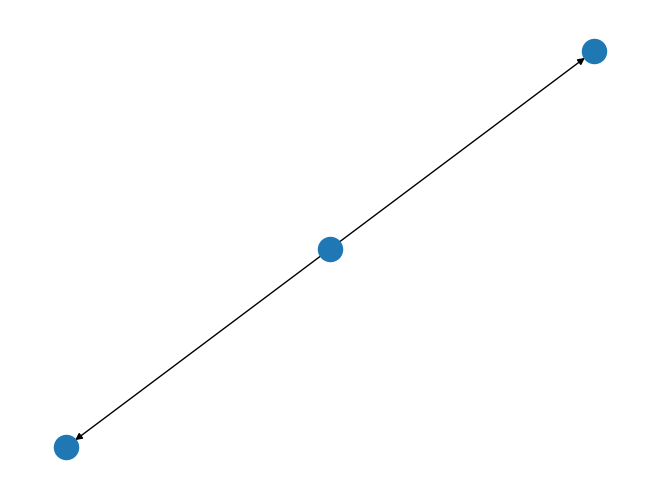

Community 77


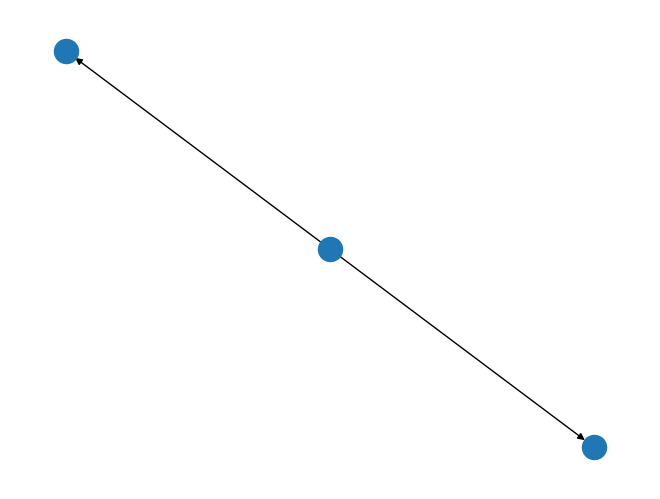

Community 83


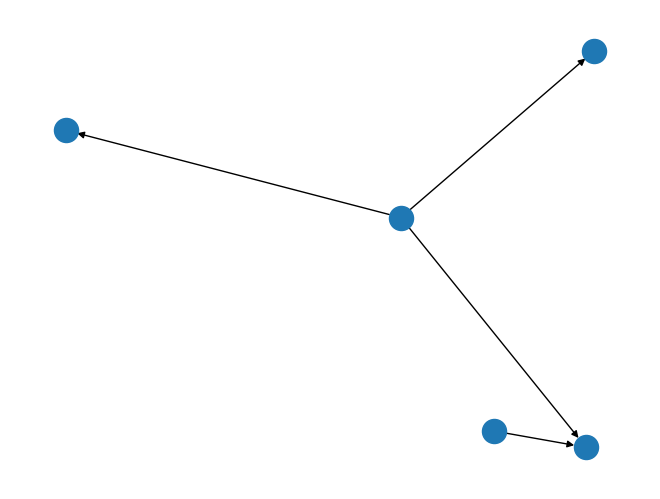

Community 89


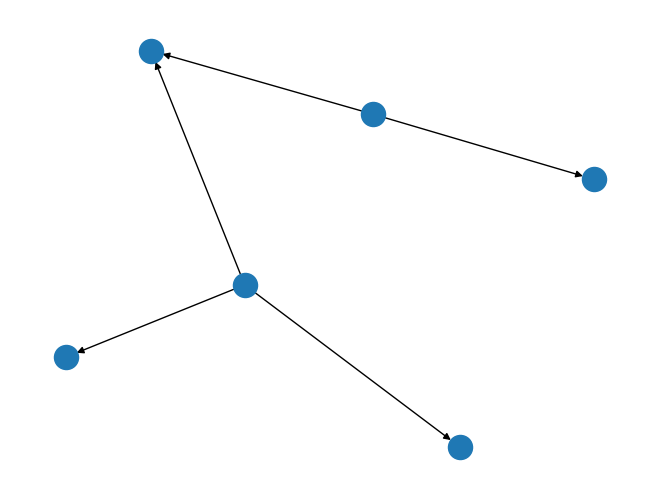

Community 97


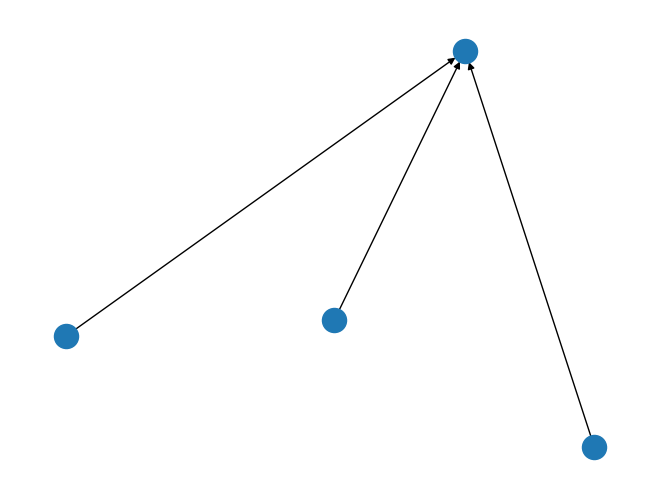

Community 99


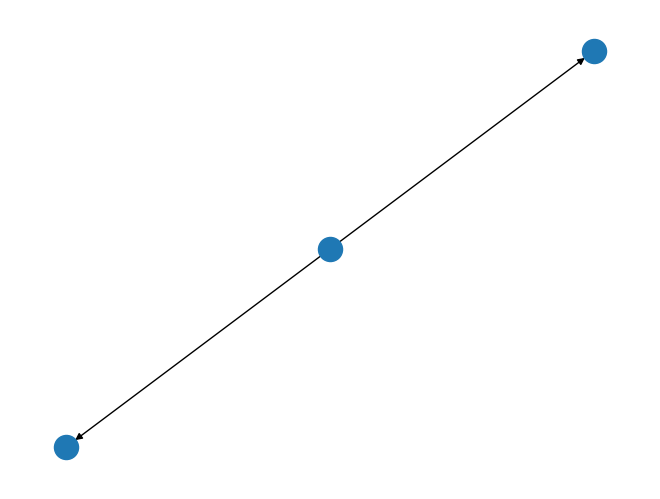

Community 102


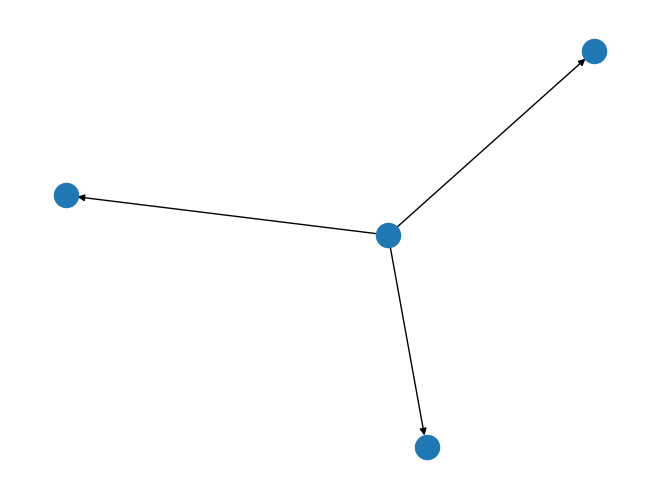

Community 105


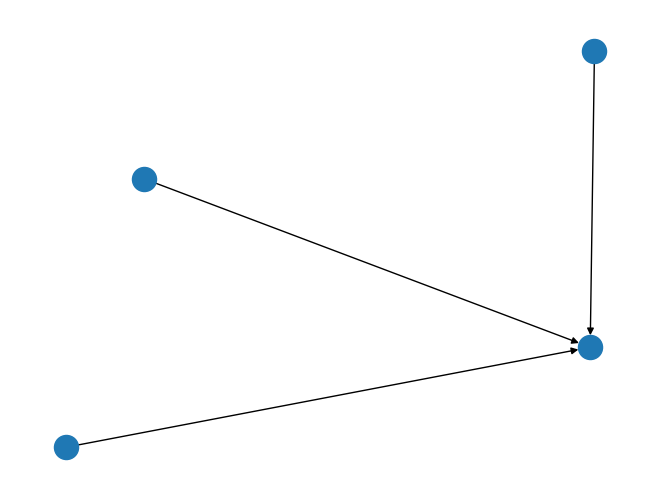

Community 113


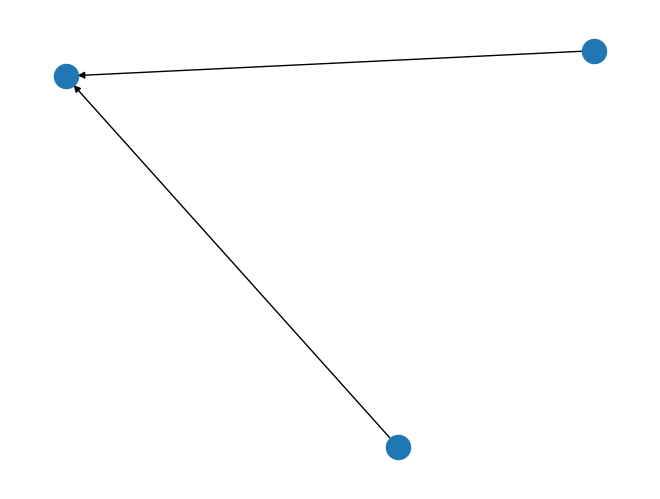

Community 114


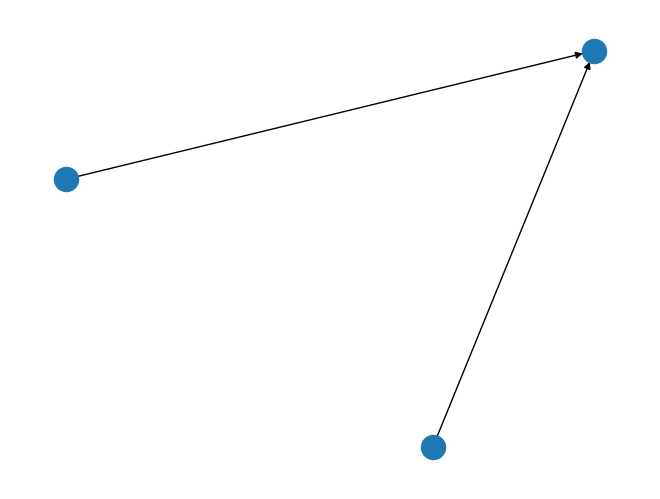

Community 123


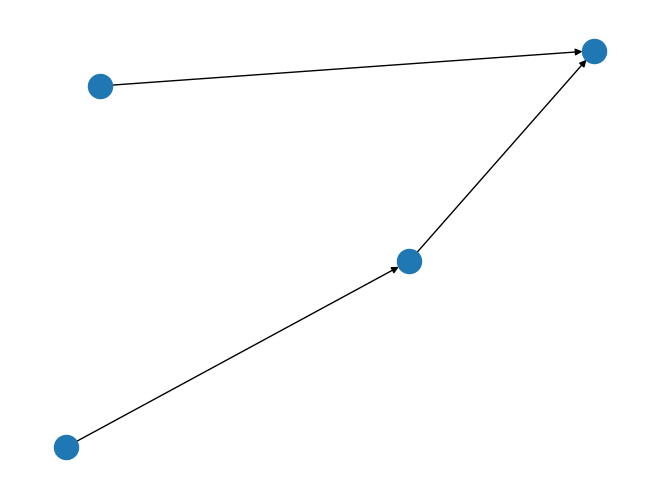

Community 126


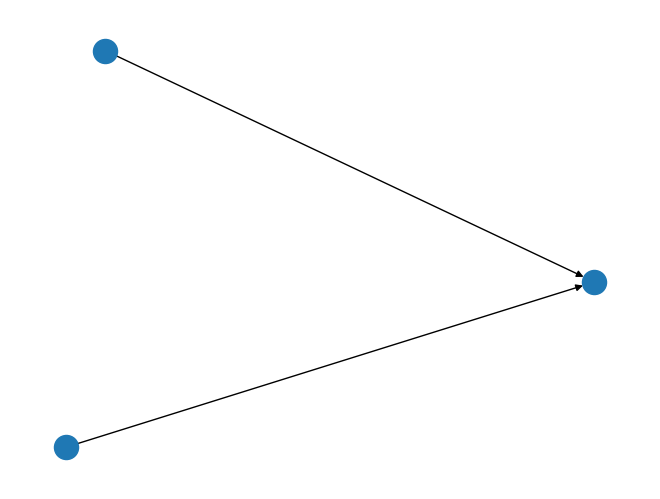

Community 128


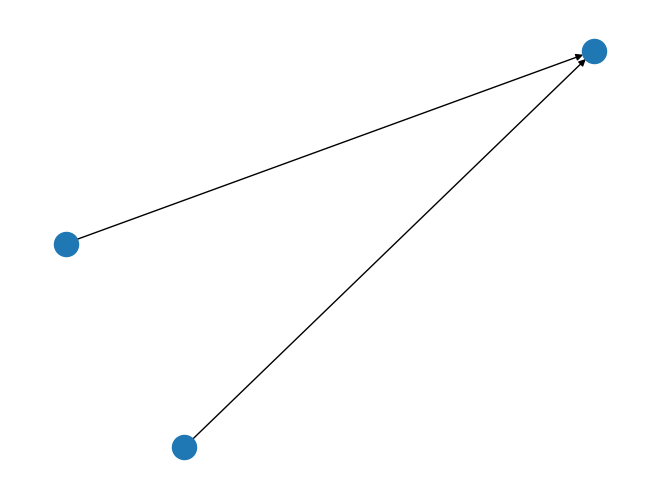

Community 134


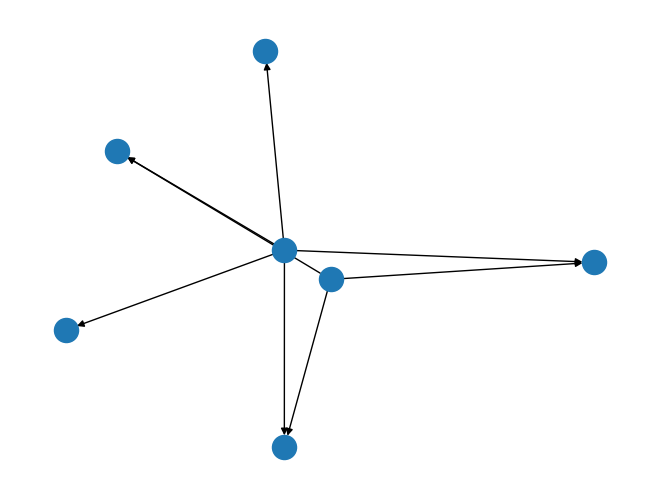

Community 157


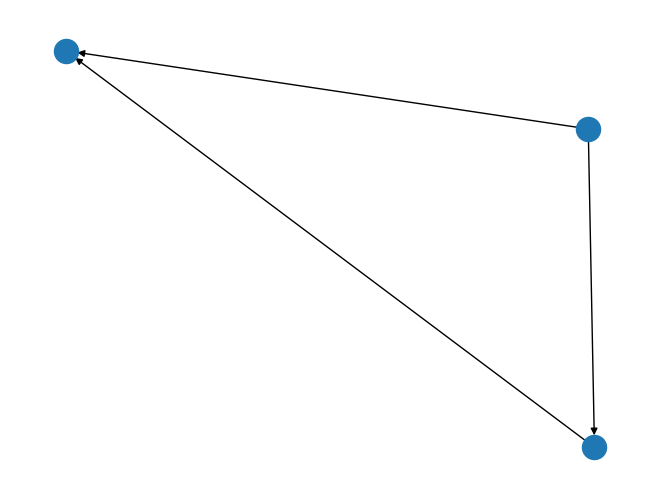

Community 191


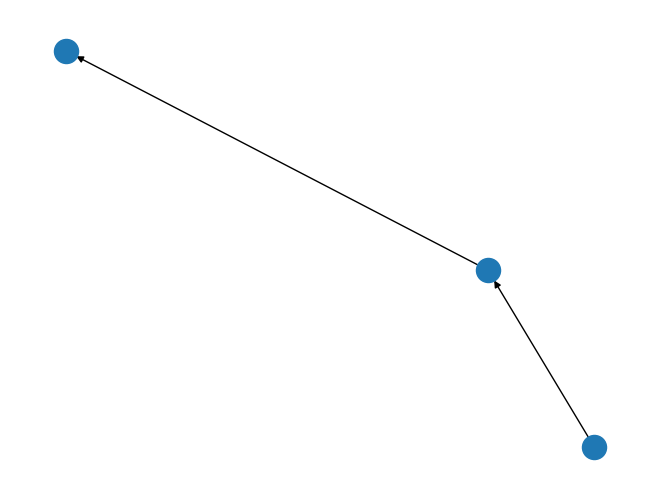

Community 213


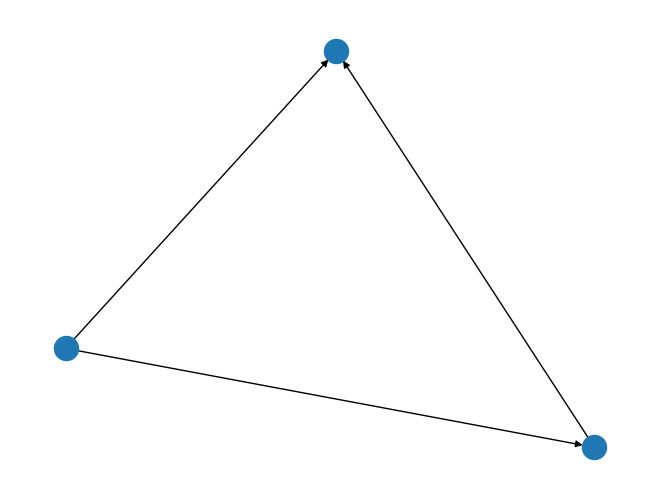

Community 265


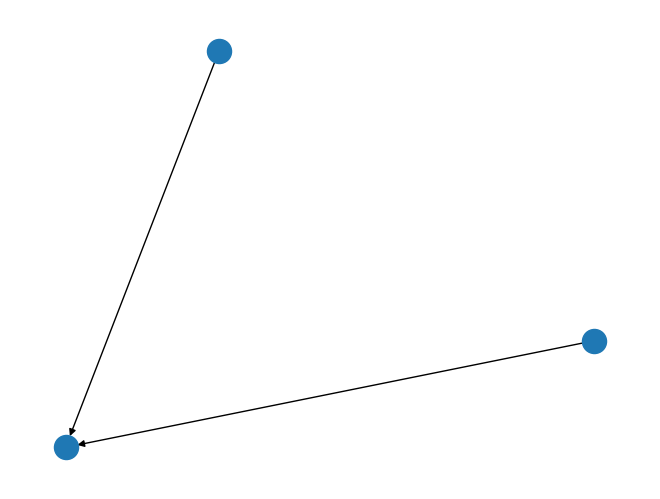

Community 363


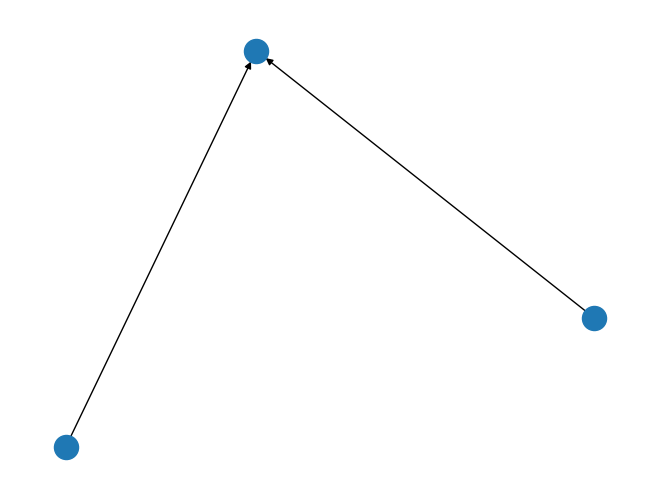

In [9]:
plt.figure(figsize=(5,3))
for i in SG:
  if len(SG[i])>2:
    print(i)
    nx.draw(GT.subgraph(SG[i]))
    plt.show()


## Clustering through Girvan Newman

1) Edges are removed based on edge betweenness centrality.

2) Node belong tha cluster when the shortest edge is present for the maximum number of times in the shortest path

In [10]:
# !pip install python-louvain
import community.community_louvain as cl


# Implementtion of Greedy Modularity Communities


In [11]:
communities = list(nx.community.greedy_modularity_communities(subgraph))


In [12]:
for i, community in enumerate(communities):
    print(f"Community {i+1}: {list(community)}")

Community 1: [9307301, 9307208, 203242, 1005, 1203, 9306325, 1019, 1309]
Community 2: [9706481, 1218, 9307241, 9307242, 9307243, 9307244, 9307245]
Community 3: [1249, 9306309, 9306328, 104217, 1226, 1103]
Community 4: [1076, 1046, 1287, 9306302, 9306334]
Community 5: [1200, 1113, 9306320, 1295]
Community 6: [1296, 1306, 9306333, 1310]
Community 7: [104249, 9306220, 1189]
Community 8: [1073, 9306251, 1204]
Community 9: [1304, 9306322, 1322]
Community 10: [1072, 1225, 203212]
Community 11: [9307201, 1002, 1172]
Community 12: [9307266, 203211, 1068]
Community 13: [1080, 1161, 1035]
Community 14: [1075, 9307291, 9307247]
Community 15: [1216, 9307326, 9306294]
Community 16: [1264, 1129, 1101]
Community 17: [1280, 1057, 1003]
Community 18: [1320, 1166, 1319]
Community 19: [104213, 1286, 104207]
Community 20: [1268, 9306230]
Community 21: [9306240, 1001]
Community 22: [9306224, 9306249]
Community 23: [104243, 9306270]
Community 24: [104208, 9306289]
Community 25: [9306208, 9306295]
Community 

Community 1:


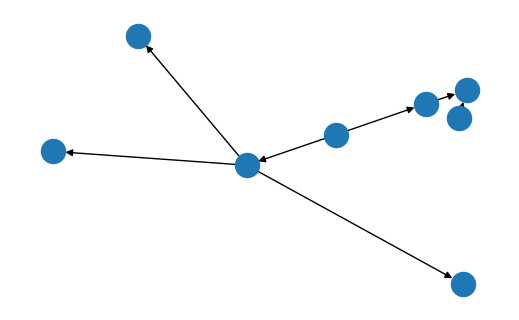

Community 2:


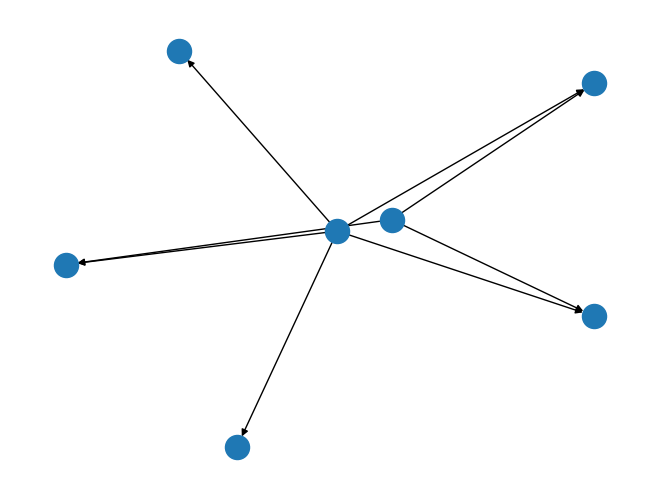

Community 3:


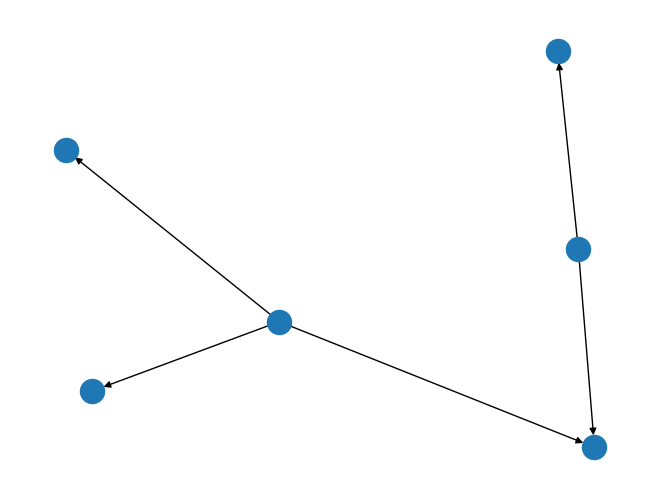

Community 4:


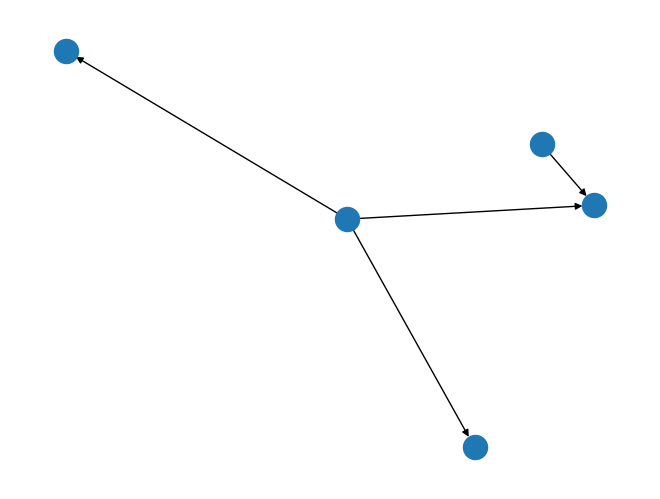

Community 5:


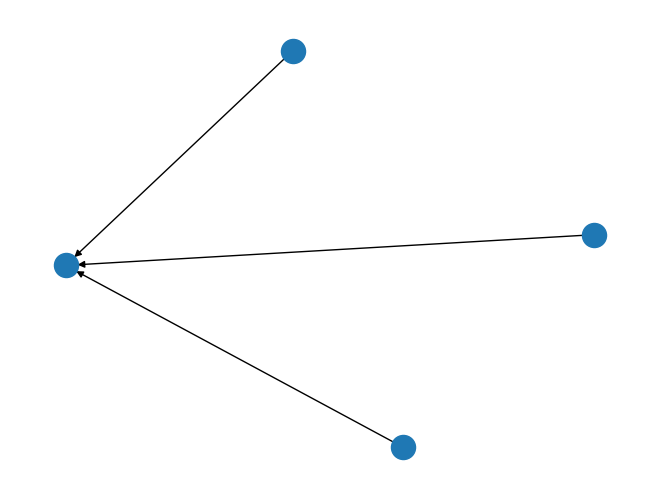

Community 6:


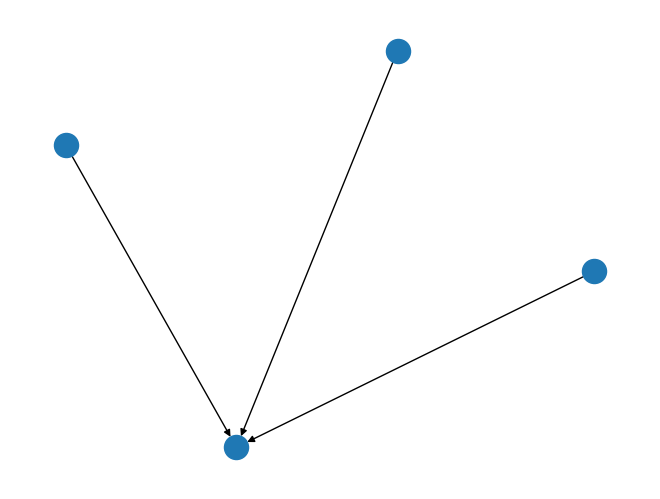

Community 7:


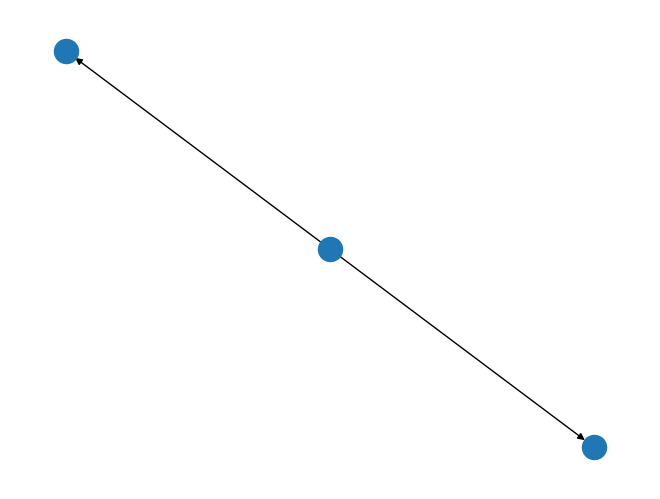

Community 8:


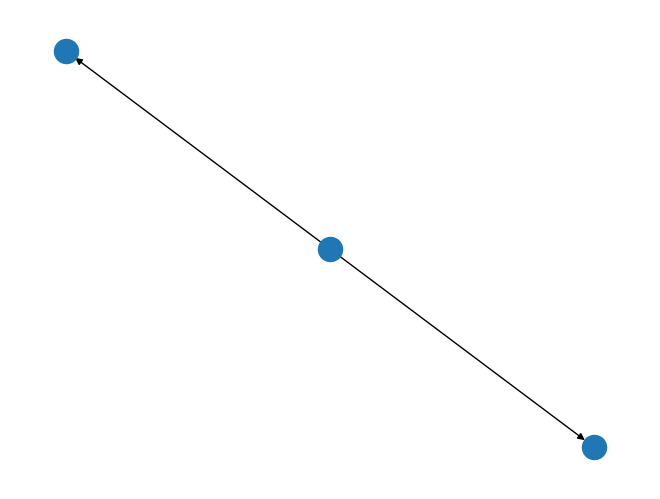

Community 9:


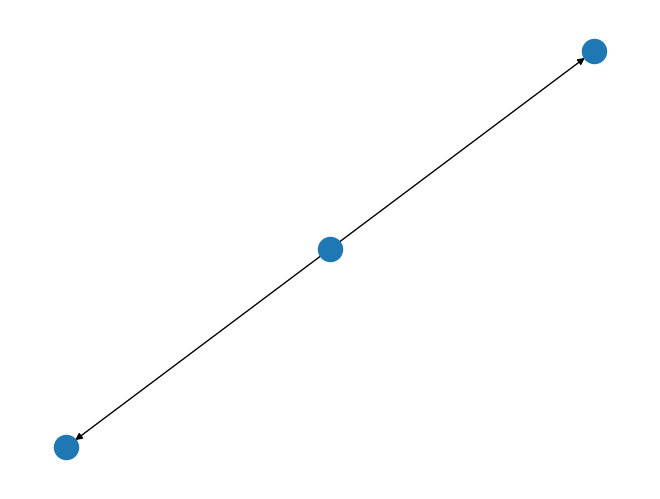

Community 10:


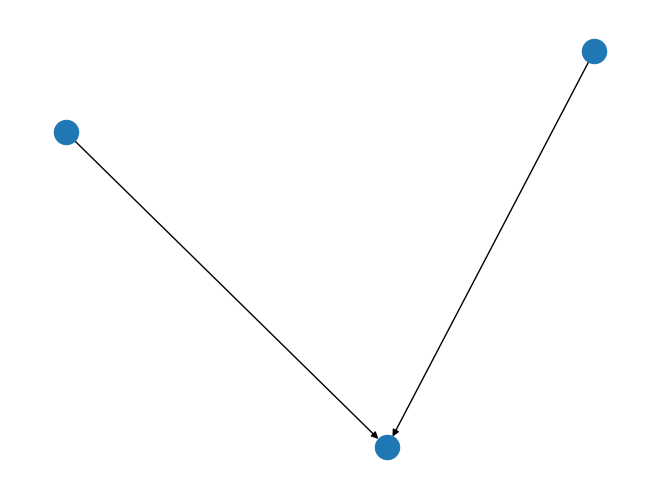

Community 11:


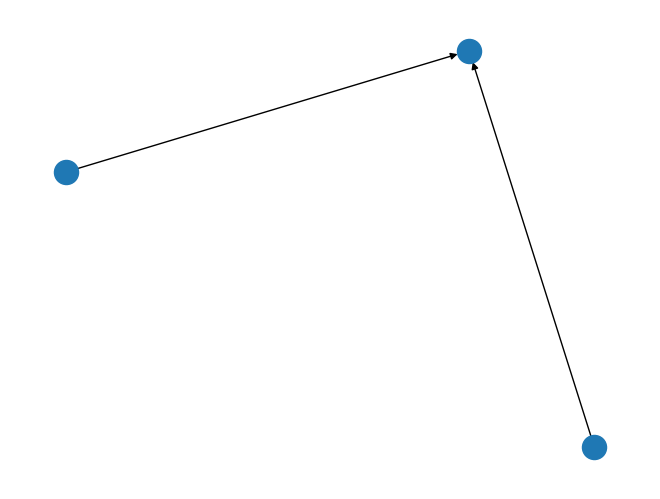

Community 12:


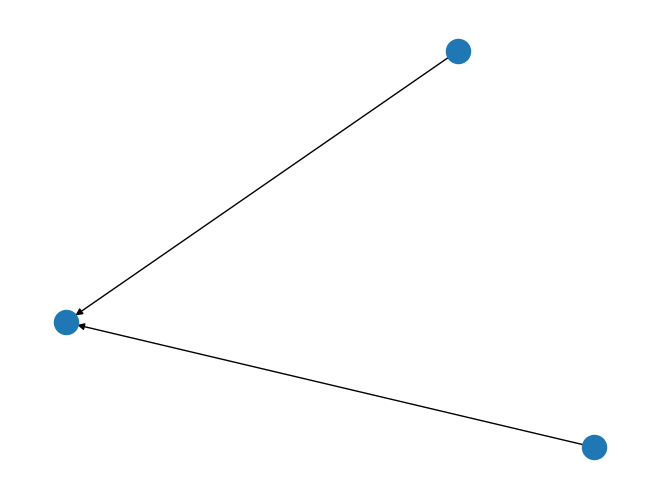

Community 13:


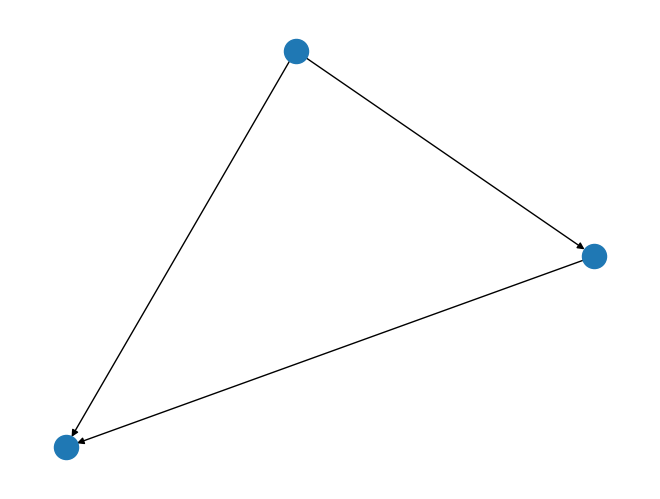

Community 14:


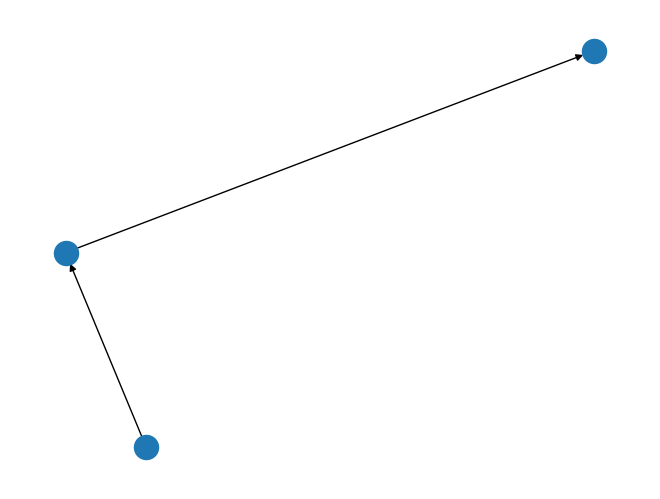

Community 15:


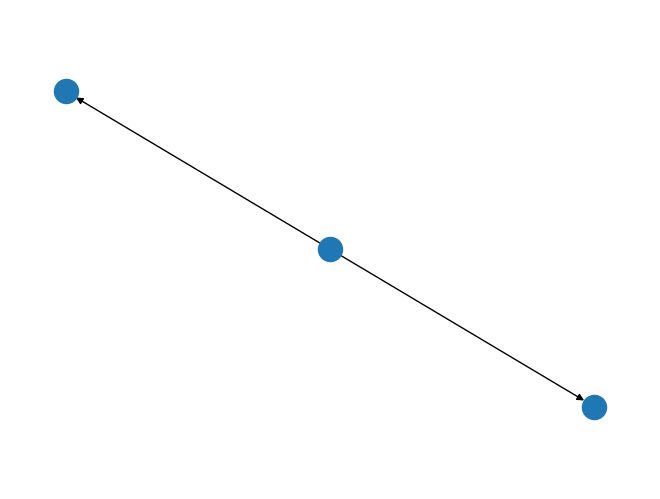

Community 16:


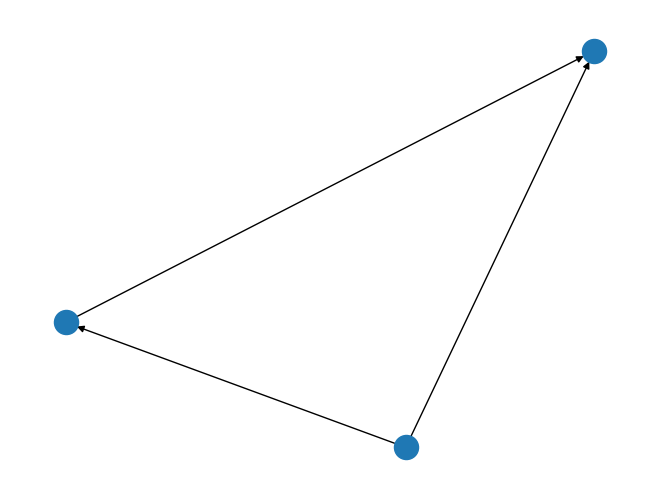

Community 17:


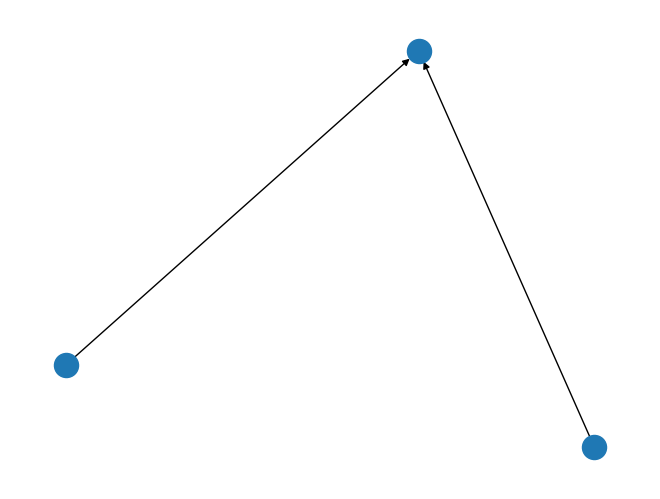

Community 18:


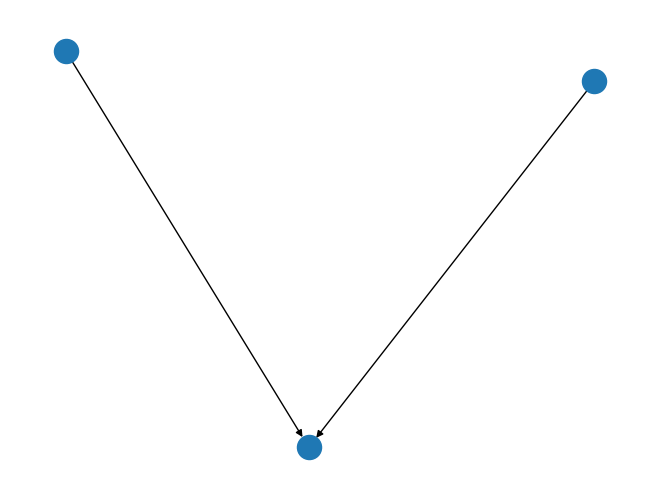

Community 19:


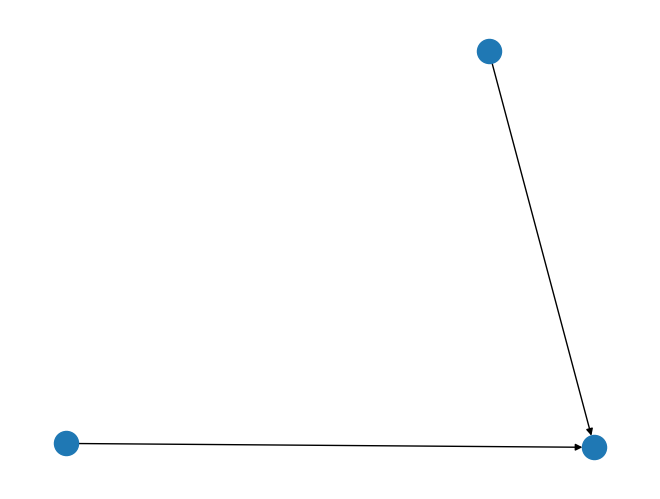

In [13]:
plt.figure(figsize=(5,3))
for n,i in enumerate(communities):
  if len(i)>2:
    print(f"Community {n+1}:")
    nx.draw(subgraph.subgraph(list(i)))
    plt.show()

## Points to Note
1) greedy modularity communities is an bottom up approach uses modularity to see if the merged set od edges increases modulartiy.

2) It is also called agglomerative

In [38]:
dfe=pd.read_csv(f'{glink}Cit-HepPh.txt', sep='\t', header=None, names=['source', 'target'],skiprows=4)
dfn=pd.read_csv(f'{glink}cit-HepPh-dates.txt', sep='\t', header=None, names=['Node', 'Time'],skiprows=1)
dfn['Time']=pd.to_datetime(dfn['Time'])


In [15]:
df = pd.merge(dfe, dfn, left_on='source', right_on='Node', how='inner')
df = pd.merge(df, dfn, left_on='target', right_on='Node', how='inner', suffixes=('_source', '_target'))

In [16]:
df_sorted=df.sort_values('Time_target')
df_sorted['Time_Edge']=df_sorted[['Time_target','Time_source']].max(axis=1)
df_sorted['Year']=df_sorted['Time_Edge'].dt.to_period('Y')

In [17]:
df_sorted['Year'].value_counts()

2001    71302
2000    64108
1999    58366
1998    44627
1997    39380
1996    29119
1995    18429
2002    13347
1994     8517
1993     2710
1992      152
Freq: A-DEC, Name: Year, dtype: int64

In [20]:
# def spectral_clustering(adjacency_matrix, n_clusters):

#     degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
#     laplacian_matrix = degree_matrix - adjacency_matrix


#     eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)


#     sorted_indices = np.argsort(eigenvalues)
#     eigenvalues = eigenvalues[sorted_indices]
#     eigenvectors = eigenvectors[:, sorted_indices]


#     cluster_matrix = eigenvectors[:, :n_clusters]


#     kmeans = KMeans(n_clusters=n_clusters)
#     labels = kmeans.fit_predict(cluster_matrix)

#     return labels

In [21]:
G = nx.DiGraph()

In [22]:
for _, row in (df_sorted[df_sorted['Year']<='1992'].iterrows()):
    source, target = row['source'], row['target']
    time_source, time_target = row['Time_source'], row['Time_target']
    G.add_node(source, time=time_source)
    G.add_node(target, time=time_target)
    G.add_edge(source, target, time=max(time_source, time_target))


In [23]:
G1 = nx.DiGraph()

In [24]:
for _, row in (df_sorted[df_sorted['Time_Edge']<='1993-05-30'].iterrows()):
    source, target = row['source'], row['target']
    time_source, time_target = row['Time_source'], row['Time_target']
    G1.add_node(source, time=time_source)
    G1.add_node(target, time=time_target)
    G1.add_edge(source, target, time=max(time_source, time_target))

In [25]:
G2 = nx.DiGraph()
for _, row in (df_sorted[df_sorted['Time_Edge']<='1993-09-30'].iterrows()):
    source, target = row['source'], row['target']
    time_source, time_target = row['Time_source'], row['Time_target']
    G2.add_node(source, time=time_source)
    G2.add_node(target, time=time_target)
    G2.add_edge(source, target, time=max(time_source, time_target))

In [26]:
evolving_communities = []
last=[]


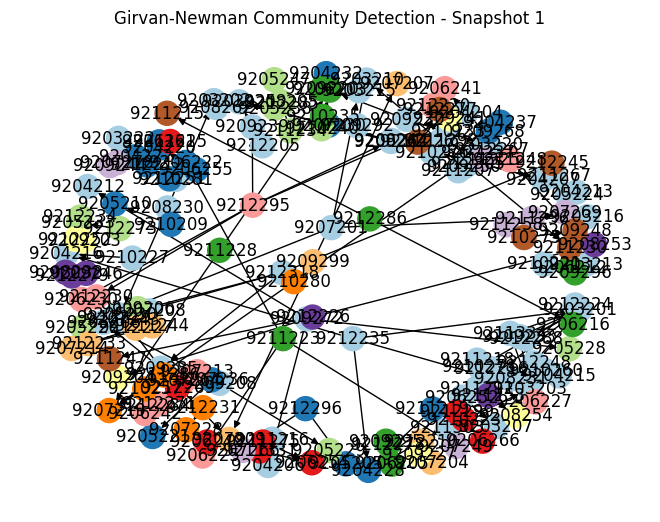

In [27]:
lay=G
comm=nx.community.greedy_modularity_communities(lay)
last_G=list(comm)
pos = nx.spring_layout(lay)
colors_snapshot1 = [i for i, comm in enumerate(last_G) for _ in comm]
nx.draw(lay, pos, node_color=colors_snapshot1, cmap=plt.cm.Paired, with_labels=True)
plt.title('Girvan-Newman Community Detection - Snapshot 1')
plt.show()


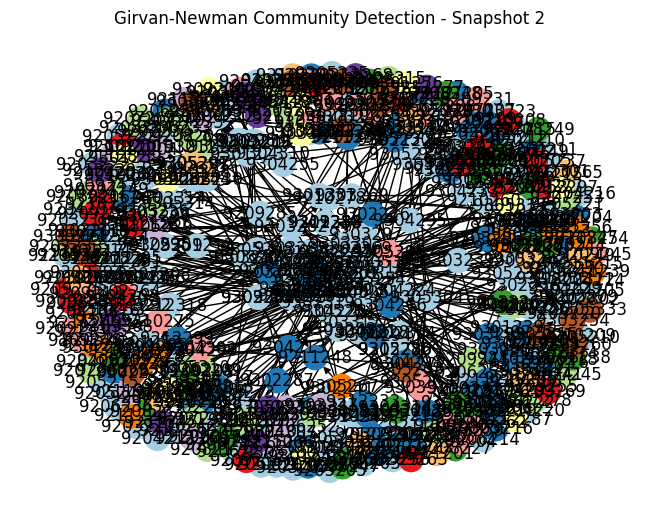

In [28]:
lay=G1
comm=nx.community.greedy_modularity_communities(lay)
last_G1=list(comm)
pos = nx.spring_layout(lay)
colors_snapshot1 = [i for i, comm in enumerate(last_G1) for _ in comm]
nx.draw(lay, pos, node_color=colors_snapshot1, cmap=plt.cm.Paired, with_labels=True)
plt.title('Girvan-Newman Community Detection - Snapshot 2')
plt.show()


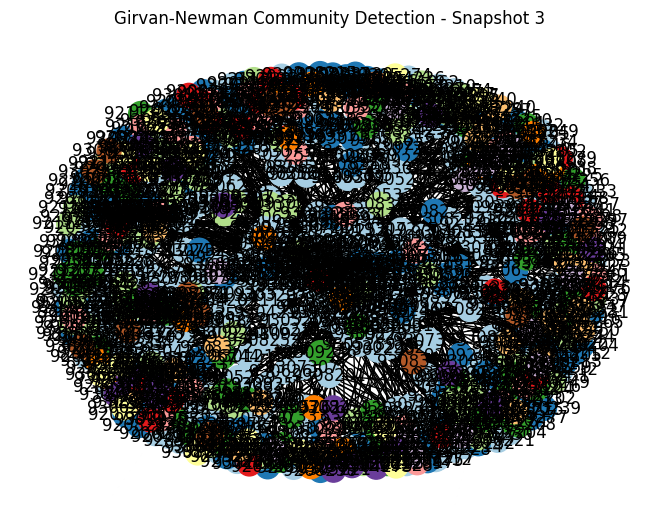

In [29]:
lay=G2
comm=nx.community.greedy_modularity_communities(lay)
last_G2=list(comm)
pos = nx.spring_layout(lay)
colors_snapshot1 = [i for i, comm in enumerate(last_G2) for _ in comm]
nx.draw(lay, pos, node_color=colors_snapshot1, cmap=plt.cm.Paired, with_labels=True)
plt.title('Girvan-Newman Community Detection - Snapshot 3')
plt.show()


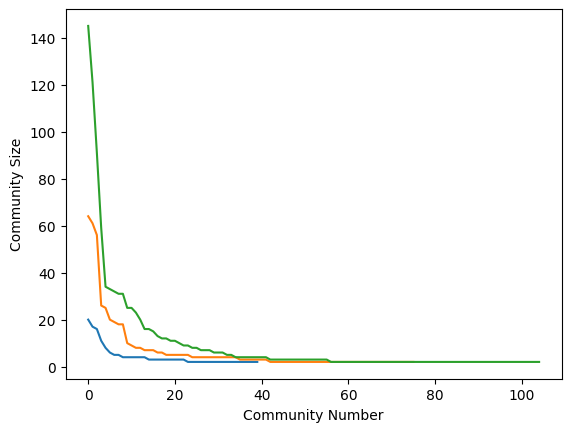

In [30]:

# last_G1
# last_G2
snapshot1 = np.array([len(i) for i in last_G])
snapshot2 =  np.array([(len(community)) for i,community in enumerate(last_G1)])
snapshot3 =  np.array([(len(community)) for i,community in enumerate(last_G2)])


plt.plot(snapshot1)
plt.plot(snapshot2)
plt.plot(snapshot3)
plt.xlabel('Community Number')
plt.ylabel('Community Size')
plt.show()
# # # snapshot1
# snapshot2

## Observation

1) the sudden spike in the 3rd year  sugeests that many papers were published that cited each other.

2) The year 1993 ending had many paper were published independently



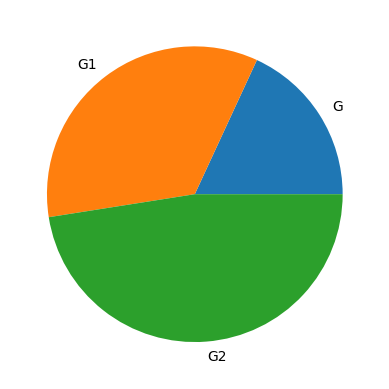

In [31]:
y = np.array([len(last_G),len(last_G1),len(last_G2)])

plt.pie(y,labels = ['G',"G1","G2"])
plt.show()


In [32]:
# def community_evolu(G):
#     lay=G
#     comm=nx.community.girvan_newman(lay)
#     last=list(comm)[-1]
#     pos = nx.spring_layout(lay)
#     colors_snapshot1 = [i for i, comm in enumerate(last) for _ in comm]
#     nx.draw(lay, pos, node_color=colors_snapshot1, cmap=plt.cm.Paired, with_labels=True)
#     plt.title('Girvan-Newman Community Detection - Snapshot')
#     plt.show()